In [184]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
import IPython.display

import librosa
import librosa.display

%matplotlib inline

In [181]:
audio_path1 = '/Users/katielazell-fairman/desktop/projects/jazz_music/music_downloads/0817-Balboa.mp3'
audio_path2 = '/Users/katielazell-fairman/desktop/projects/jazz_music/music_downloads/0947-Blues.mp3'
audio_path3 = '/Users/katielazell-fairman/documents/music/Si Tu Vois Ma Mère - Midnight in Paris (2011)-bmVTnLR02Nc.mp3'
y, sr = librosa.load(audio_path3)

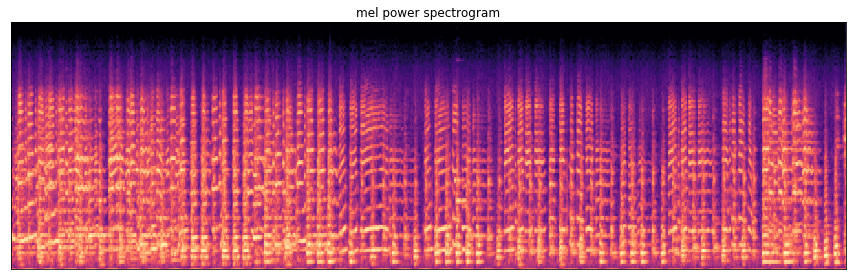

In [188]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram

y, sr = librosa.load('/Users/katielazell-fairman/Downloads/CA499759-01.mp3')
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S) #sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
#plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

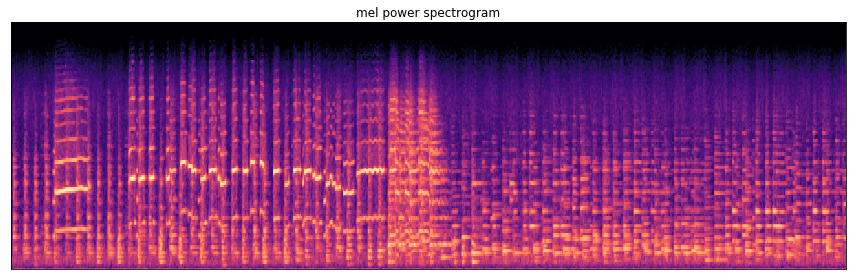

In [190]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram

y, sr = librosa.load('/Users/katielazell-fairman/Downloads/CA499759-04.mp3')
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S) #sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
#plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

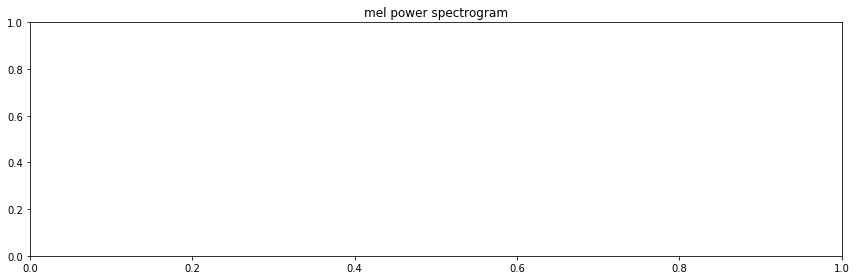

In [183]:
# Plot of Si Tu Vois Ma Mère - Midnight in Paris (2011)

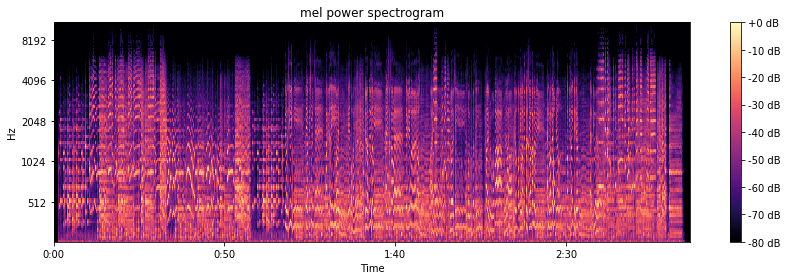

In [18]:
#Plt of 0947-Blues.mp3
plt.show()

In [47]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Now, let's run the beat tracker.
# We'll use the percussive component for this part
plt.figure(figsize=(12, 6))
tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr)

# Let's re-draw the spectrogram, but this time, overlay the detected beats
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Let's draw transparent lines over the beat frames
plt.vlines(librosa.frames_to_time(beats),
           1, 0.5 * sr,
           colors='w', linestyles='-', linewidth=2, alpha=0.3)

plt.axis('tight')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()


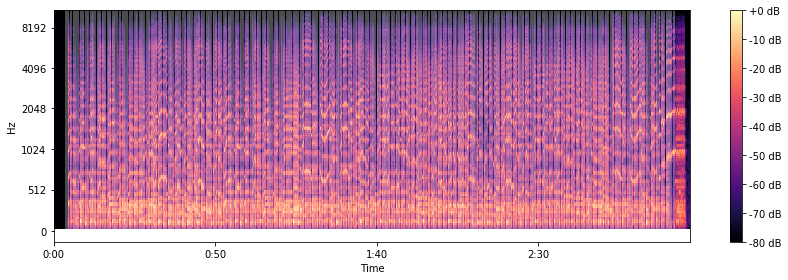

In [48]:
# Plot of Si Tu Vois Ma Mère - Midnight in Paris (2011)
plt.show()

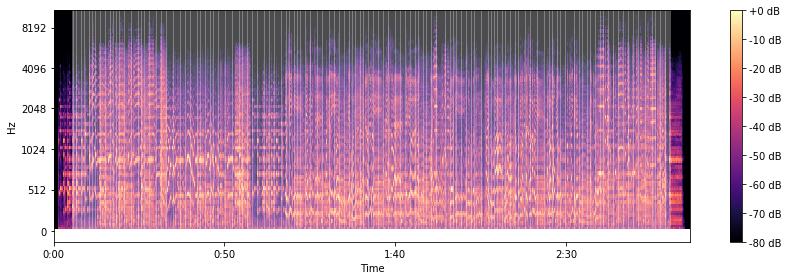

In [26]:
#Plt of 0947-Blues.mp3
plt.show()

In [14]:
#0817-Balboa.mp3 - BPM online = 139

print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))

Estimated tempo:        143.55 BPM
('First 5 beat frames:   ', array([ 2, 20, 39, 58, 77]))
('First 5 beat times:    ', array([ 0.04643991,  0.46439909,  0.90557823,  1.34675737,  1.78793651]))


In [24]:
#0947-Blues.mp3 - BPM online = 77

print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))

Estimated tempo:        123.05 BPM
('First 5 beat frames:   ', array([240, 261, 281, 301, 321]))
('First 5 beat times:    ', array([ 5.57278912,  6.06040816,  6.52480726,  6.98920635,  7.45360544]))


In [49]:
#Plot of Si Tu Vois Ma Mère - Midnight in Paris (2011) - BPM online = 77

print('Estimated tempo:        %.2f BPM' % tempo)

print('First 5 beat frames:   ', beats[:5])

# Frame numbers are great and all, but when do those beats occur?
print('First 5 beat times:    ', librosa.frames_to_time(beats[:5], sr=sr))

Estimated tempo:        80.75 BPM
('First 5 beat frames:   ', array([164, 196, 234, 267, 299]))
('First 5 beat times:    ', array([ 3.80807256,  4.55111111,  5.43346939,  6.19972789,  6.94276644]))


In [191]:
from pydub import AudioSegment
from pydub import effects
from pydub import silence
import random
import numpy as np
import pandas as pd

In [168]:
##Break this into Class

def song_samples(splits,duration,song_mp3,skip=30):
    
    """
    INPUTS
    Splits: (int) no. of splits, the song will be is split into (where feasible)
    duration: (int) number of seconds of each sample (e.g. 10.5 seconds)
    """
    #def song_stats(splits,duration,song_mp3,skip=30)
    song = AudioSegment.from_file(song_mp3)
    song_duration = (song.duration_seconds - skip)/splits
    print song.duration_seconds
    print song_duration

    max_wait = int(round((song.duration_seconds - (splits*duration))/splits,0))
    print "max wait:",max_wait
    #Return song, max_wait

    
    
    if song_duration > duration:
        start = skip
        
        #def get_splits_save(splits,duration,song_mp3,skip=30, spacer_seconds)
        
        for split in range(1,splits+1):
            #Extract segment
            segment = song[start*1000:(start+duration)*1000]
            segment = segment.set_channels(1)
            segment = effects.normalize(segment)

            #create random lag time between segment
            spacer_seconds = random.randint(0, max_wait)
            start = start+duration+spacer_seconds

            print start
            print "spacer: {}".format(spacer_seconds)
            if segment.duration_seconds == duration:

                filename ="{}-{}.mp3".format(song_mp3[:-4],str(split).zfill(2))
                print filename
            #segment.export(filename, format="wav")
            else:
                segment = song[-duration*1000:]
                segment = segment.set_channels(1)
                segment = effects.normalize(segment)
                print segment.duration_seconds
                filename ="{}-{}.mp3".format(song_mp3[:-4],str(split).zfill(2))
                print filename
                break
                
    else: 
        print "nope!"
        start = skip
        
        for split in range(1,splits+1):
            #Extract segment
            segment = song[start*1000:(start+duration)*1000]
            segment = segment.set_channels(1)
            segment = effects.normalize(segment)

            #create random lag time between segment
            spacer_seconds = random.randint(-10, 0)
            start = start+duration+spacer_seconds

            print start
            print "spacer: {}".format(spacer_seconds)
            if segment.duration_seconds == duration:

                filename ="{}-{}.mp3".format(song_mp3[:-4],str(split).zfill(2))
                print filename
                #Save file
                segment.export(filename, format="wav")
            else:
                segment = song[-duration*1000:]
                segment = segment.set_channels(1)
                segment = effects.normalize(segment)
                print segment.duration_seconds
                filename ="{}-{}.mp3".format(song_mp3[:-4],str(split).zfill(2))
                print filename
                break




In [ ]:
def split_rule(df,song_id):
    '''
    A rule function used to determine no. of splits, a given song is split into
    
    INPUT
    df: (pd.Dataframe) containing song ID and feature columns which will be referenced 
    song_id: (int)
    
    OUTPUT
    splits: (int)
    
    ''
    
    

In [273]:
#Create Binary Feature columns

df = pd.read_csv("metadata_downloads/Swing_Dance_Style_Master_DownloadA.csv")

#Determine Superlikes

yes = df['Superlike'].unique()[1:]
df['Superlike_True'] = df['Superlike'].map(lambda x: 1 if x in yes else 0)

#Determine Danceability & Swing-Dancablity
df['Swing_Danceable'] = df['Style-Katie'].map(lambda x: 1 if x != 'None' else 0)
df['Other_Danceable'] = df['Notes'].map(lambda x: 1 if x in ['other', 'latin', 'bluegrass', 'country'] else 0)
df['Danceable'] = df['Swing_Danceable']+ df['Other_Danceable']

#Identify swing-dancible but not so great songs

df['Not_Great'] = df['Notes'].map(lambda x: 1 if x in ['not great', 'not good'] else 0)
df['Poor_Quality_Recording'] = df['Notes'].str.contains('quality', 'Quality')


#Sampling no. rule

def split_rule(df,song_id):
    #If a swing-dancable song is Superliked, take 7 samples
    if (df['Swing_Danceable'].loc[song_id] + df['Superlike_True'].loc[song_id])  == 2:
        return 7
    #If a swing-dancable song is disliked, take 4 samples
    if (df['Swing_Danceable'].loc[song_id] + df['Not_Great'].loc[song_id]) == 2:
        return 4
    #If a swing-dancable song is neither superliked or disliked, take 6 samples
    if (df['Swing_Danceable'].loc[song_id] + df['Not_Great'].loc[song_id]) == 1:
        return 6
    else:
        return 4
 

    

df.head(40)

for song in range(0,20):
    print split_rule(df,song)


4
4
4
4
4
6
6
4
4
4
4
6
4
7
7
6
4
4
4
4


In [ ]:
split_rule(df,song_id)

In [169]:
song_samples(7,30,"/Users/katielazell-fairman/Downloads/CA499759.mp3")

176.666122449
20.952303207
max wait: -5
nope!
55
spacer: -5
/Users/katielazell-fairman/Downloads/CA499759-01.mp3
77
spacer: -8
/Users/katielazell-fairman/Downloads/CA499759-02.mp3
103
spacer: -4
/Users/katielazell-fairman/Downloads/CA499759-03.mp3
130
spacer: -3
/Users/katielazell-fairman/Downloads/CA499759-04.mp3
155
spacer: -5
/Users/katielazell-fairman/Downloads/CA499759-05.mp3
177
spacer: -8
30.0
/Users/katielazell-fairman/Downloads/CA499759-06.mp3


In [170]:
song = AudioSegment.from_file("/Users/katielazell-fairman/Downloads/CA499759-01.mp3")

In [171]:
song

In [172]:
song2 = AudioSegment.from_file("/Users/katielazell-fairman/Downloads/CA499759-02.mp3")

In [173]:
song2

In [176]:
song3 = AudioSegment.from_file("/Users/katielazell-fairman/Downloads/CA499759-03.mp3")

In [177]:
song3

In [178]:
song4 = AudioSegment.from_file("/Users/katielazell-fairman/Downloads/CA499759-04.mp3")

In [179]:
song4